In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../src/")
import json

import numpy as np
import pandas as pd
import math
from datasets import Dataset, list_metrics, load_metric
from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from data_processing.dataset_processor import DataProcessor

In [12]:
val_users = list(val_df.author.unique())

In [14]:
small_val_set = np.random.choice(val_users, size=10, replace=False)

In [15]:
small_val_set

array(['Chad_arbc', 'HelloImLucas', 'binarygold', 'closingbell',
       'peimom123', 'robert323445', 'brookswilliams', 'Creative310',
       'Thatawkwardhipster', 'hrrm'], dtype='<U20')

In [5]:
data_df = pd.read_csv("/data/ddmg/redditlanguagemodeling/data/3_all_data_user_filtered_2021-06-21.csv")
data_df.drop(columns="Unnamed: 0", inplace=True)

In [8]:
train_df = data_df[data_df["data_split"] == "train"]
val_df = data_df[data_df["data_split"] == "val"]
test_df = data_df[data_df["data_split"] == "test"]

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(data=new_val, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

50

In [18]:
small_val_df = val_df[val_df['author'].isin(small_val_set)]
small_test_df = test_df[test_df['author'].isin(small_val_set)]

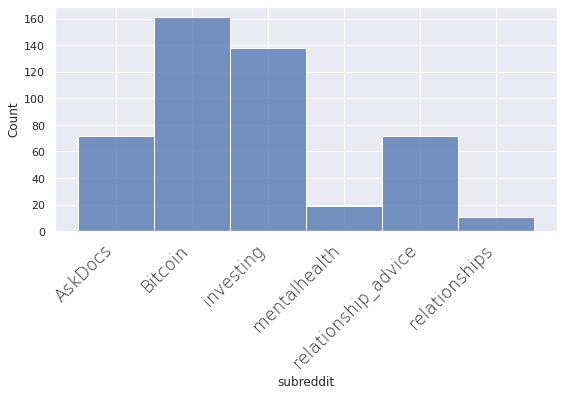

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(data=val_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

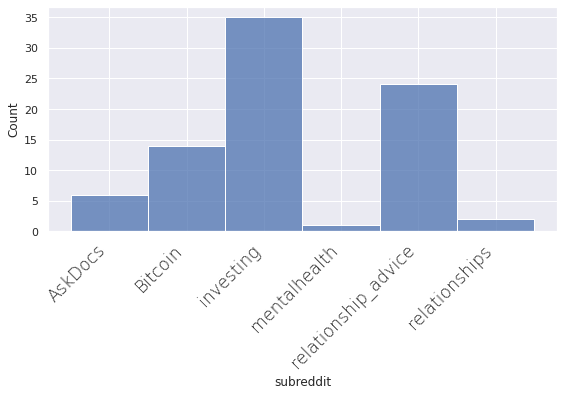

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(data=small_val_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

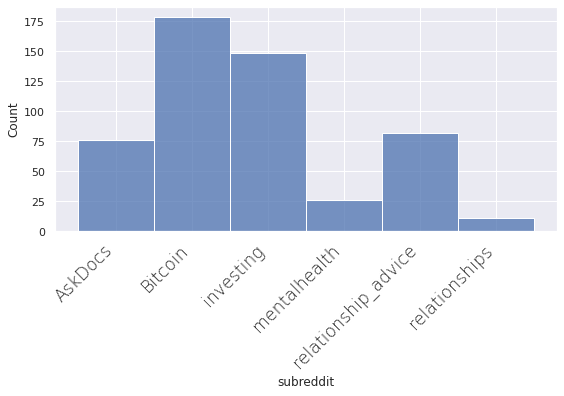

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(data=test_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

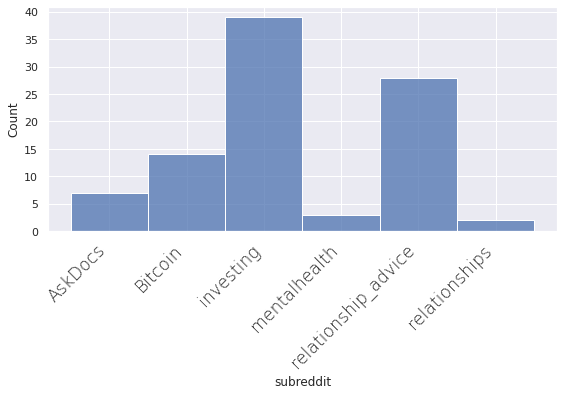

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(data=small_test_df, x="subreddit")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

35


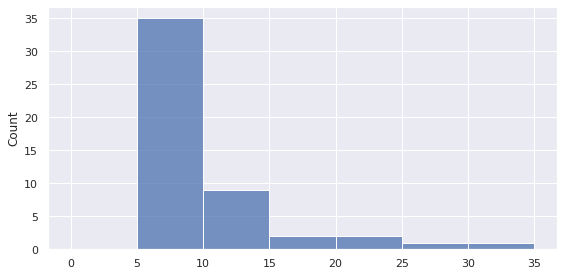

In [23]:
plt.figure(figsize=(8,4))
counts= val_df.groupby('author').count()['id'].values
max_range = max(counts)
if max_range % 5 != 0:
    max_range = max(counts) + 5 - max(counts) % 5
print(max_range)
sns.histplot(x=counts, binwidth=5, binrange=(0, max_range))
plt.tight_layout()
plt.show()

15


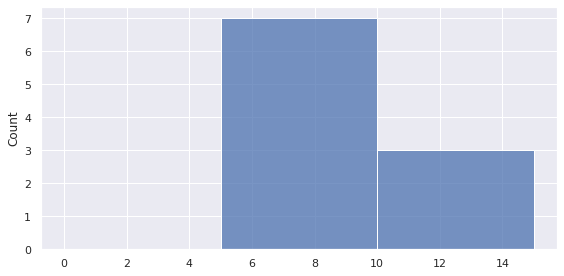

In [24]:
plt.figure(figsize=(8,4))
counts= small_val_df.groupby('author').count()['id'].values
max_range = max(counts)
if max_range % 5 != 0:
    max_range = max(counts) + 5 - max(counts) % 5
print(max_range)
sns.histplot(x=counts, binwidth=5, binrange=(0, max_range))
plt.tight_layout()
plt.show()

35


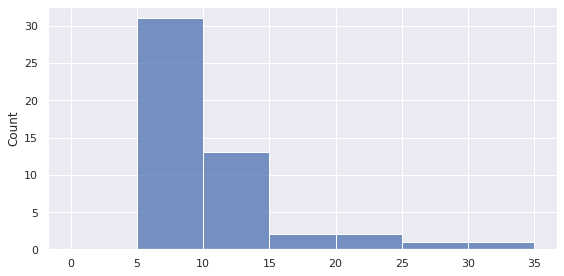

In [25]:
plt.figure(figsize=(8,4))
counts= test_df.groupby('author').count()['id'].values
max_range = max(counts)
if max_range % 5 != 0:
    max_range = max(counts) + 5 - max(counts) % 5
print(max_range)
sns.histplot(x=counts, binwidth=5, binrange=(0, max_range))
plt.tight_layout()
plt.show()

15


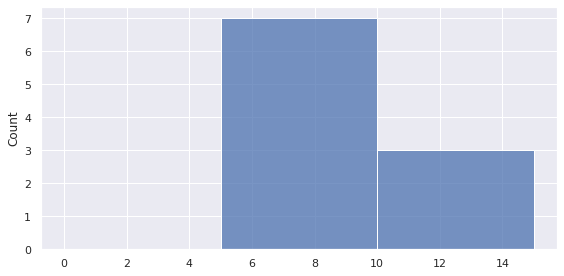

In [27]:
plt.figure(figsize=(8,4))
counts= small_test_df.groupby('author').count()['id'].values
max_range = max(counts)
if max_range % 5 != 0:
    max_range = max(counts) + 5 - max(counts) % 5
print(max_range)
sns.histplot(x=counts, binwidth=5, binrange=(0, max_range))
plt.tight_layout()
plt.show()

In [28]:
len(train_df[train_df["author"] != "exab"])

21600

In [29]:
len(train_df[train_df["author"] == "exab"])

85